In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

In [15]:
x = np.linspace(0, 10 ,15 )
y = np.sin(x)

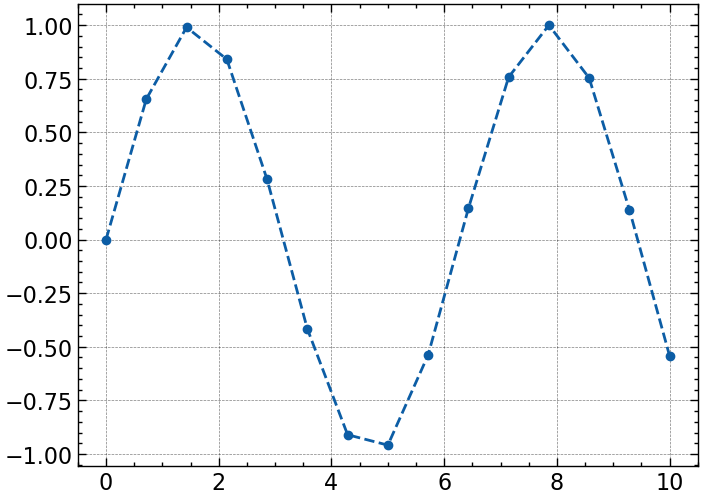

In [300]:
plt.plot(x,y, 'o--')

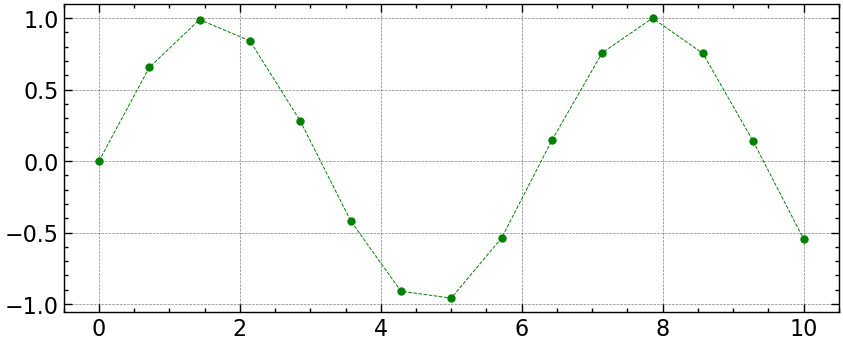

In [301]:
plt.figure(figsize=(10,4))
plt.plot(x,y, 'o--', color='green', lw=0.7, ms=5)

Text(0, 0.5, 'Current[I]')

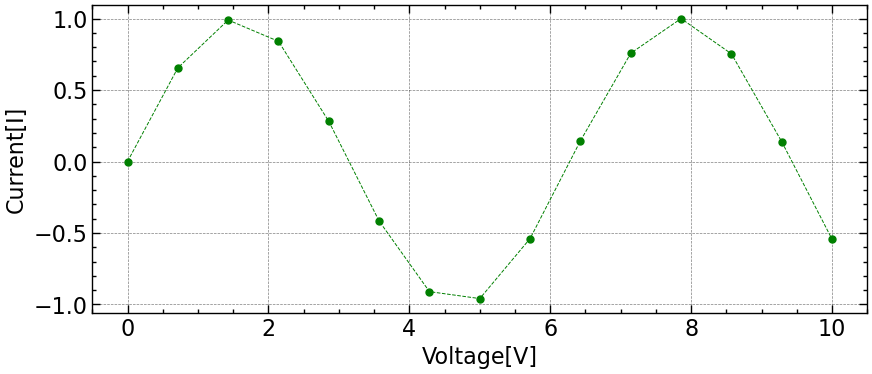

In [302]:
plt.figure(figsize=(10,4))
plt.plot(x,y, 'o--', color='green', lw=0.7, ms=5)
plt.xlabel('Voltage[V]')
plt.ylabel('Current[I]')

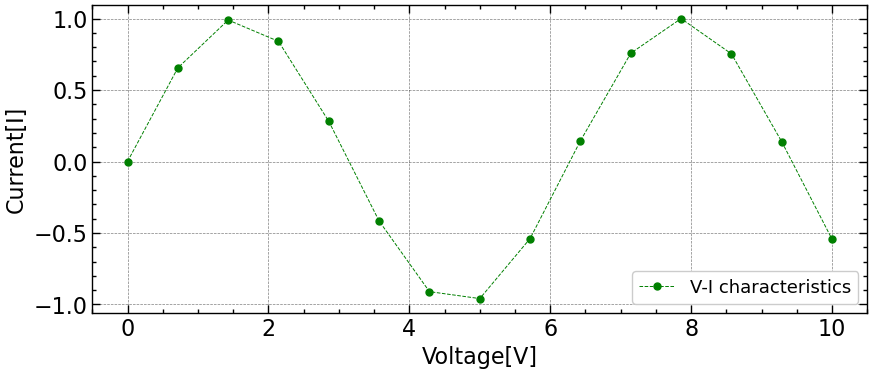

In [303]:
plt.figure(figsize=(10,4))
plt.plot(x,y, 'o--', color='green', lw=0.7, ms=5, label='V-I characteristics')
plt.xlabel('Voltage[V]')
plt.ylabel('Current[I]')
plt.legend(loc='lower right', fontsize=13)

In [17]:
x2 = np.linspace(0,10,50)
y2 = np.sin(x2)

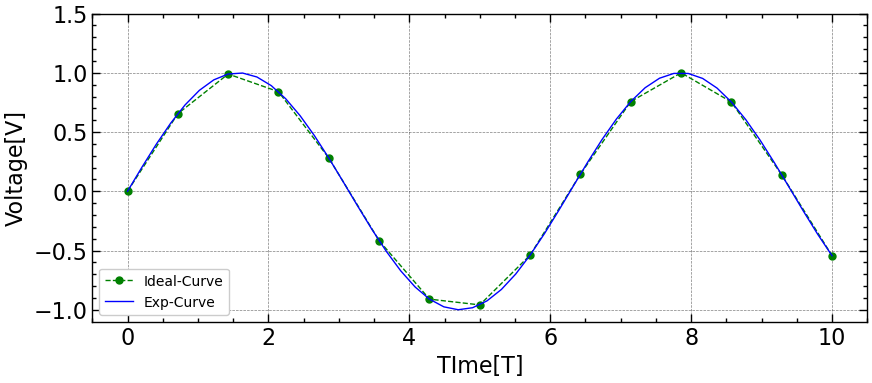

In [19]:
plt.figure(figsize=(10,4))
plt.plot(x,y, 'o--', color='green', lw=1, ms=5, label='Ideal-Curve')
plt.plot(x2,y2, '-', color='blue', lw=1, ms=5, label='Exp-Curve')
plt.xlabel('TIme[T]')
plt.ylabel('Voltage[V]')
plt.ylim(top=1.5)
plt.legend(loc='lower left', fontsize=10)

In [ ]:
plt.savefig('plot.png', dpi=200)

# A More Advanced API

For more complicated plots, such as

1) Multiple subplots on 1 figure
2) Conveniently adding text to plots
3) Creating animation

one needs to use a slightly more advanced API

### Single Axes in one Figure

In [50]:
x = np.mgrid[0:1:10*1j]
y = np.sin(2*x)

Text(0.5, 1.0, 'Probability Density Function')

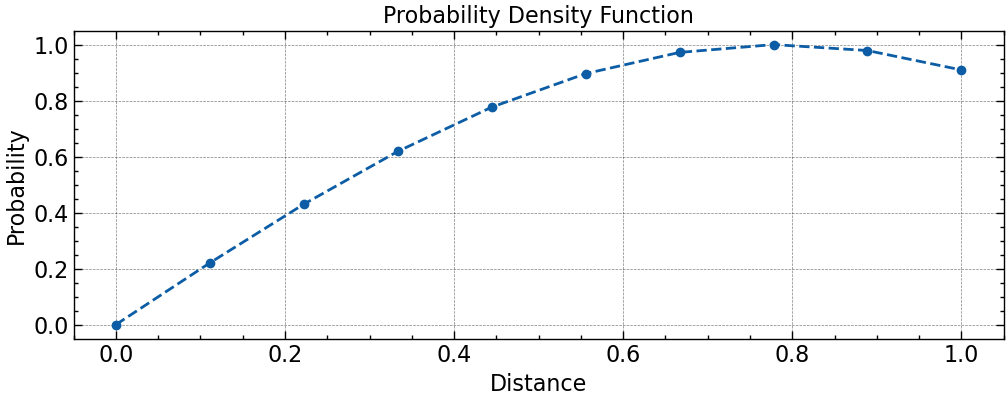

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(x, y, 'o--')
ax.set_xlabel('Distance')
ax.set_ylabel('Probability')
ax.set_title('Probability Density Function')

### Multiple axes in 1 figure

Text(0.5, 1.0, 'PDF')

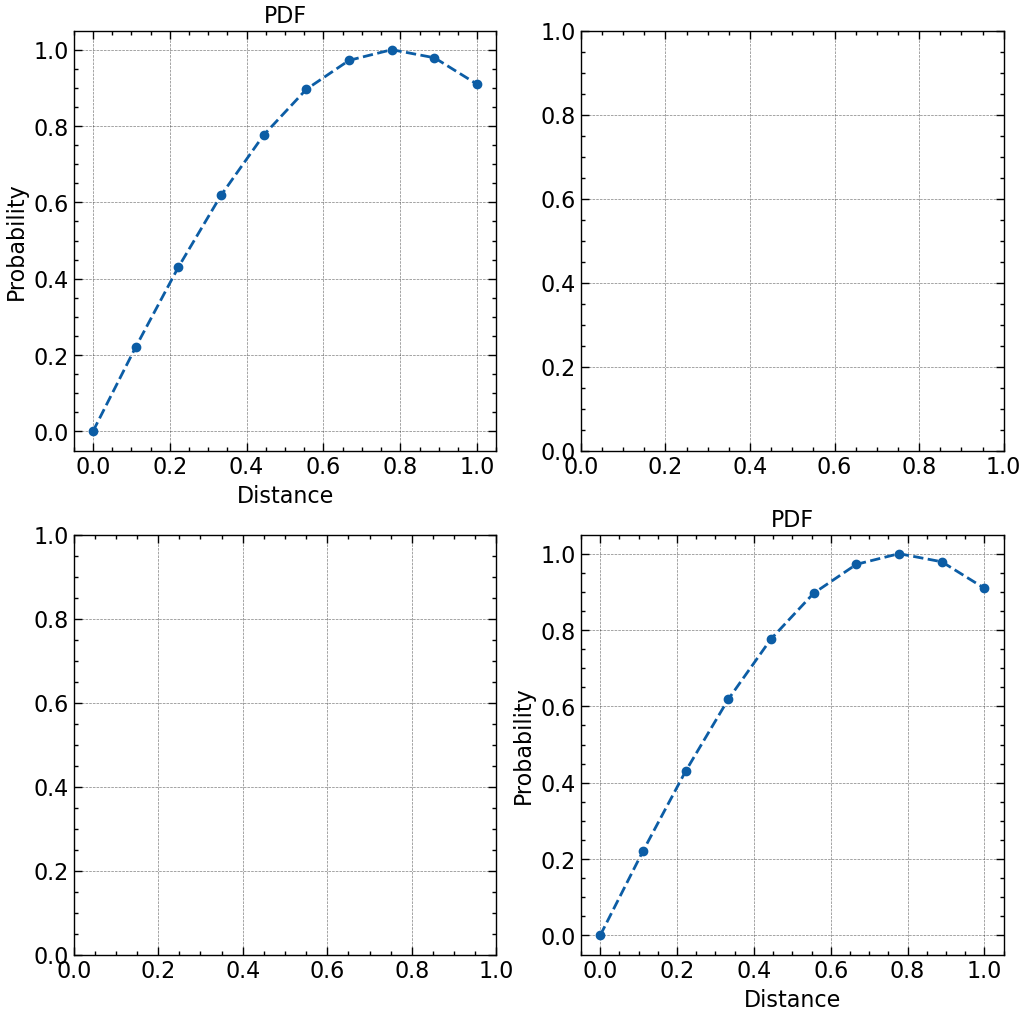

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
ax = axes[0][0]
ax.plot(x, y, 'o--')
ax.set_xlabel('Distance')
ax.set_ylabel('Probability')
ax.set_title('PDF')
ax = axes[1][1]
ax.plot(x, y, 'o--')
ax.set_xlabel('Distance')
ax.set_ylabel('Probability')
ax.set_title('PDF')

# 2D Plots

Generate some data

In [98]:
x, y = np.mgrid[-1:1:100*1j, -1:1:100*1j]
z = x**2 + x*y

### Filled-in contour plot

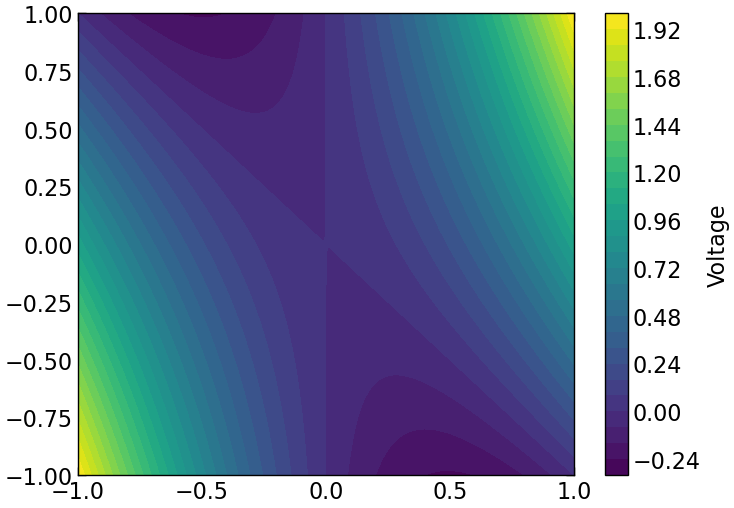

In [106]:
plt.contourf(x, y, z, levels=30)
plt.colorbar(label='Voltage')

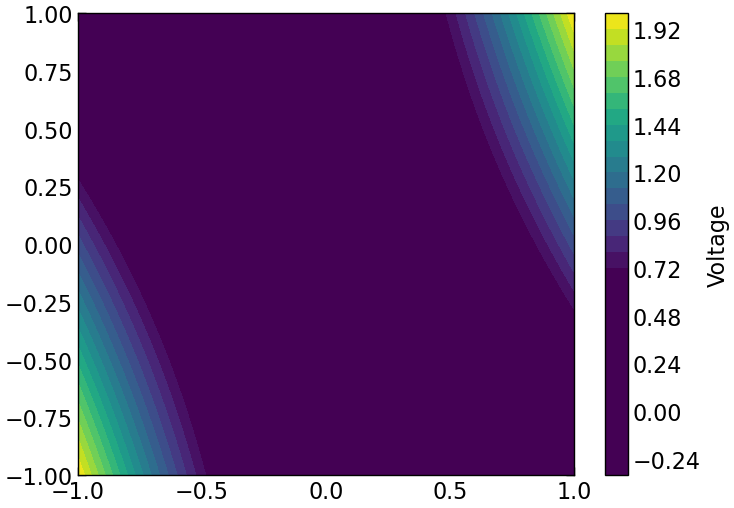

In [108]:
plt.contourf(x, y, z, levels=30, vmin=0.7)
plt.colorbar(label='Voltage')

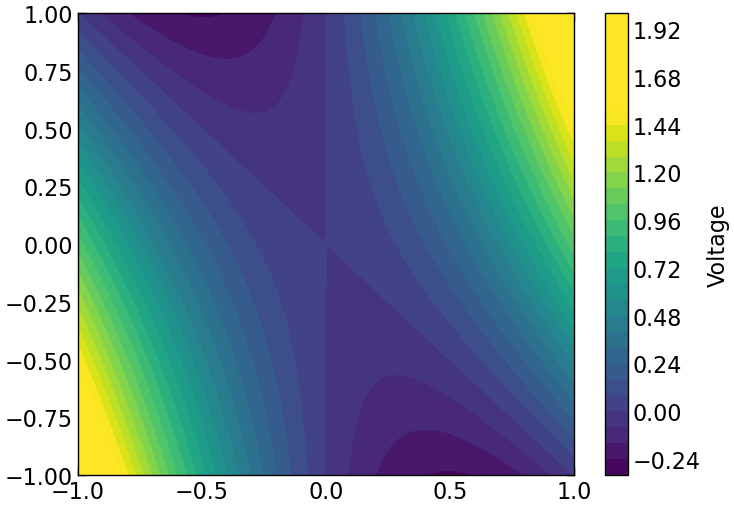

In [110]:
plt.contourf(x, y, z, levels=30, vmax=1.5)
plt.colorbar(label='Voltage')

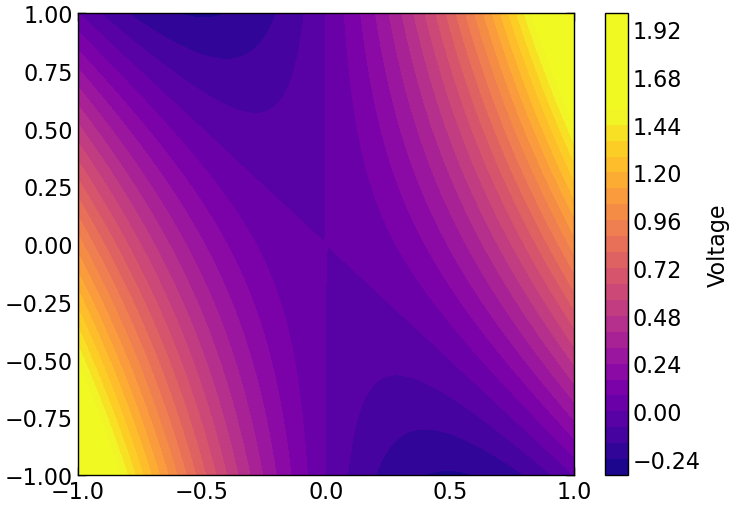

In [112]:
plt.contourf(x, y, z, levels=30, vmax=1.5, cmap='plasma')
plt.colorbar(label='Voltage')

### Contour Plot

sometimes, the following is preferred :

<a list of 28 text.Text objects>

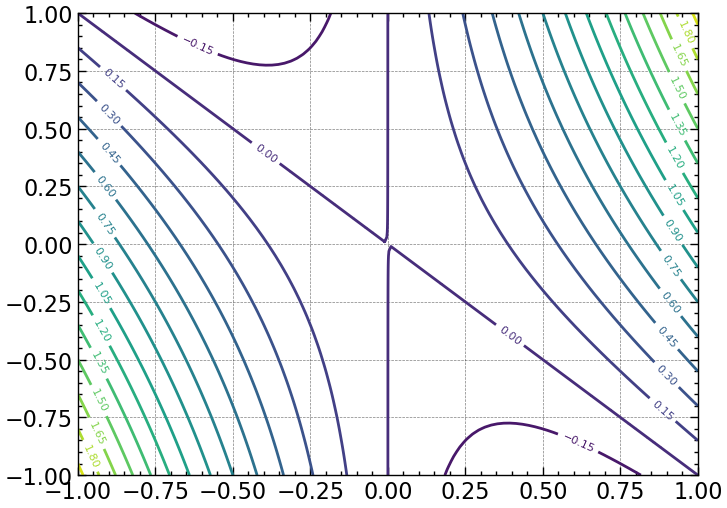

In [123]:
cs = plt.contour(x, y, z, levels=20)
plt.clabel(cs, fontsize=8)

# 3D Surface Plot

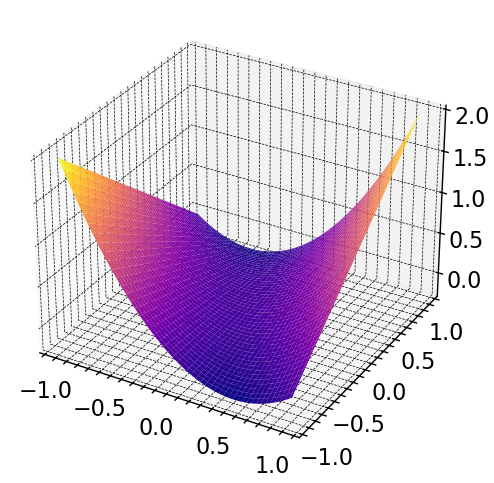

In [132]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
ax.plot_surface(x, y, z, cmap='plasma')

## StreamPlot

For plotting vector fields

In [357]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

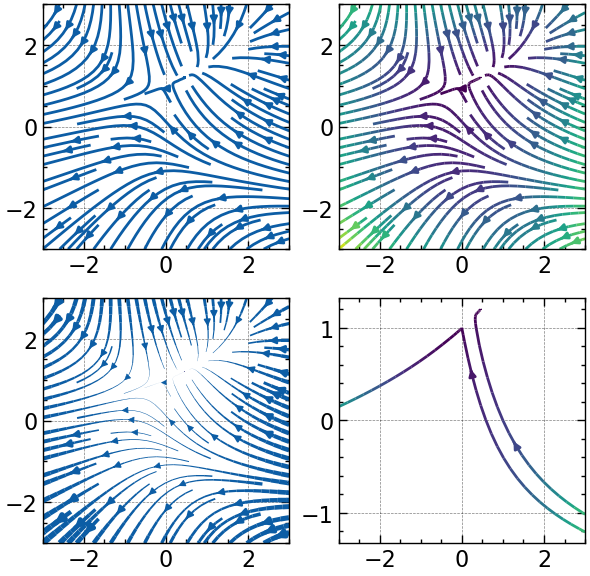

In [371]:
fig, axes = plt.subplots(2, 2, figsize=(7,7))
ax = axes[0][0]
ax.streamplot(X,Y,U,V)
ax = axes[0][1]
ax.streamplot(X,Y,U,V, color=speed)
ax = axes[1][0]
lw = 5*speed / speed.max()
ax.streamplot(X,Y,U,V, linewidth=lw)
ax = axes[1][1]
lw = 5*speed / speed.max()
seedpoints = np.array([[0,1], [1,0]])
ax.streamplot(X,Y,U,V, color=speed, start_points=seedpoints)

# Image Reading

In [37]:
im = plt.imread('C:/Users/saura/OneDrive/Desktop/images/Galaxy2.jpg')

Plot image

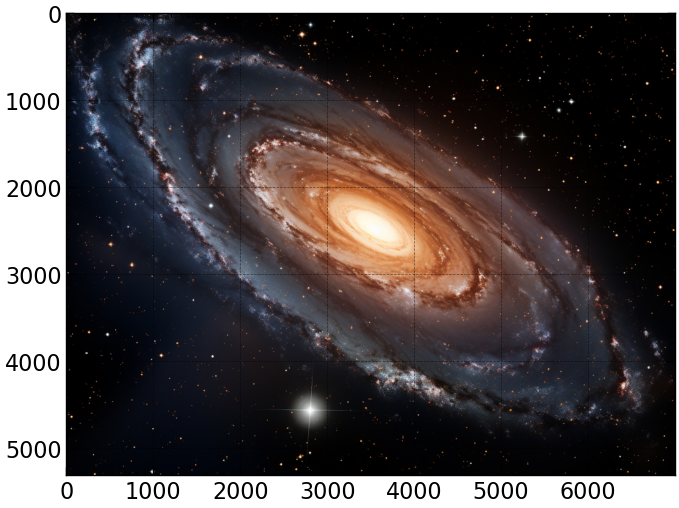

In [39]:
plt.imshow(im)

# Animation

Animations require relating the time of your problem to the frame of the animation, then specifying the frames per second

Given below is a sin wave moving at 3m/s. translate this into an animation

In [3]:
def f(x,t):
    return np.sin(x - 3*t)

x = np.mgrid[0:10*np.pi:1000*1j]

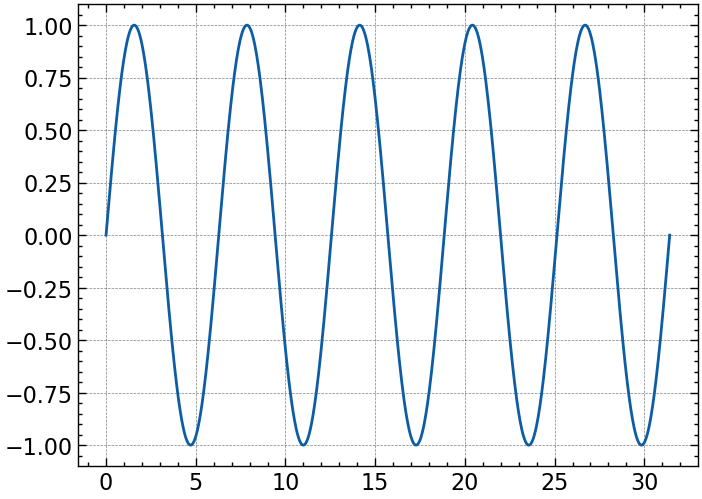

In [10]:
plt.plot(x, f(x,0))

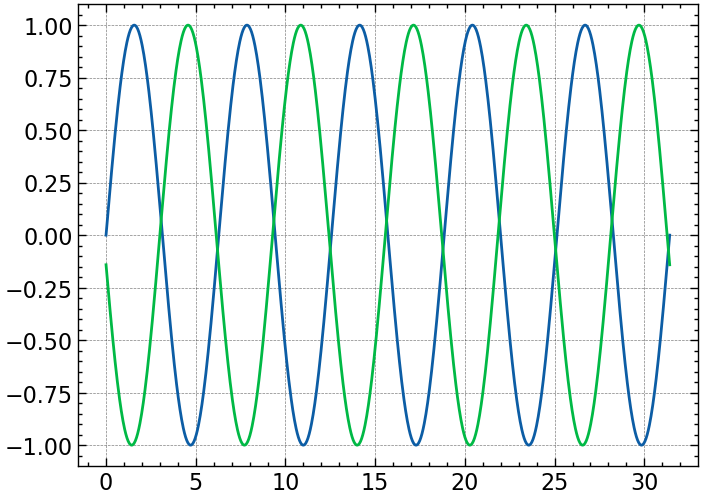

In [12]:
plt.plot(x, f(x,0))
plt.plot(x, f(x,1))

Create Animation

In [13]:
from matplotlib import animation
from matplotlib.animation import PillowWriter
from matplotlib.animation import FuncAnimation

(-1.5, 1.5)

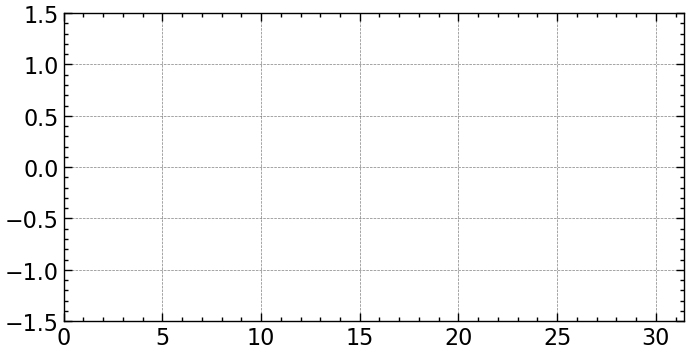

In [7]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
ln1 = plt.plot([])
time_text = ax.text(0.65, 0.95, '', fontsize=15, 
                    transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
ax.set_xlim(0,10*np.pi)
ax.set_ylim(-1.5, 1.5)

In [9]:
def animate(i):
    ln1.set_data(x, f(x, 1/50*i))
    time_text.set_text('t={:.2f}'.format(i/50))

In [41]:
ani = animation.FuncAnimation(fig, animate, frames=240, interval=50)
ani.save('C:/Users/saura/OneDrive/Desktop/images/ani.gif', writer='pillow', fps=50, dpi=100)

# 3D Rotating Plot

In [15]:
from matplotlib import animation
from matplotlib.animation import PillowWriter
from matplotlib.animation import FuncAnimation

In [17]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_,_)
z = x**2+x*y

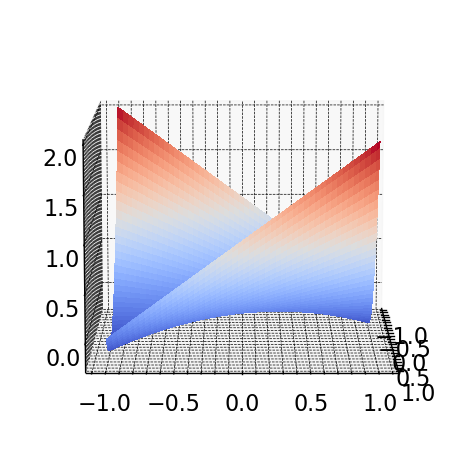

In [23]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x,y,z, cmap='coolwarm',
                       linewidth=0, antialiased=False)
ax.view_init(elev=10, azim=0)

def animate(i):
    ax.view_init(elev=10, azim=3*i)
    
ani = animation.FuncAnimation(fig, animate, frames=120, interval=50)
ani.save('C:/Users/saura/OneDrive/Desktop/images/ani_2.gif',writer='pillow',fps=30,dpi=100)